**TASK 1-IRIS FLOWER CLASSIFICATION**

*BY INTERN GOWRI SM*

IMPORT LIBRARIES FOR DATA VISUALIZATION AND DATA MANIPULATION

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



IMPORTING AND LOADING THE DATASET

In [ ]:

data = pd.read_csv('/content/Iris.csv')


In [ ]:
print("Dataset Preview:")
print(data.head())


Dataset Preview:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


EXPLORATORY DATA ANALYSIS

In [ ]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [ ]:
print(data.isnull().sum())


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [ ]:
print(data.describe())



               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [ ]:
print(data['Species'].value_counts())


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [ ]:
print(data['Species'].value_counts())



Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


DATA VISUALIZATION

PAIRPLOT

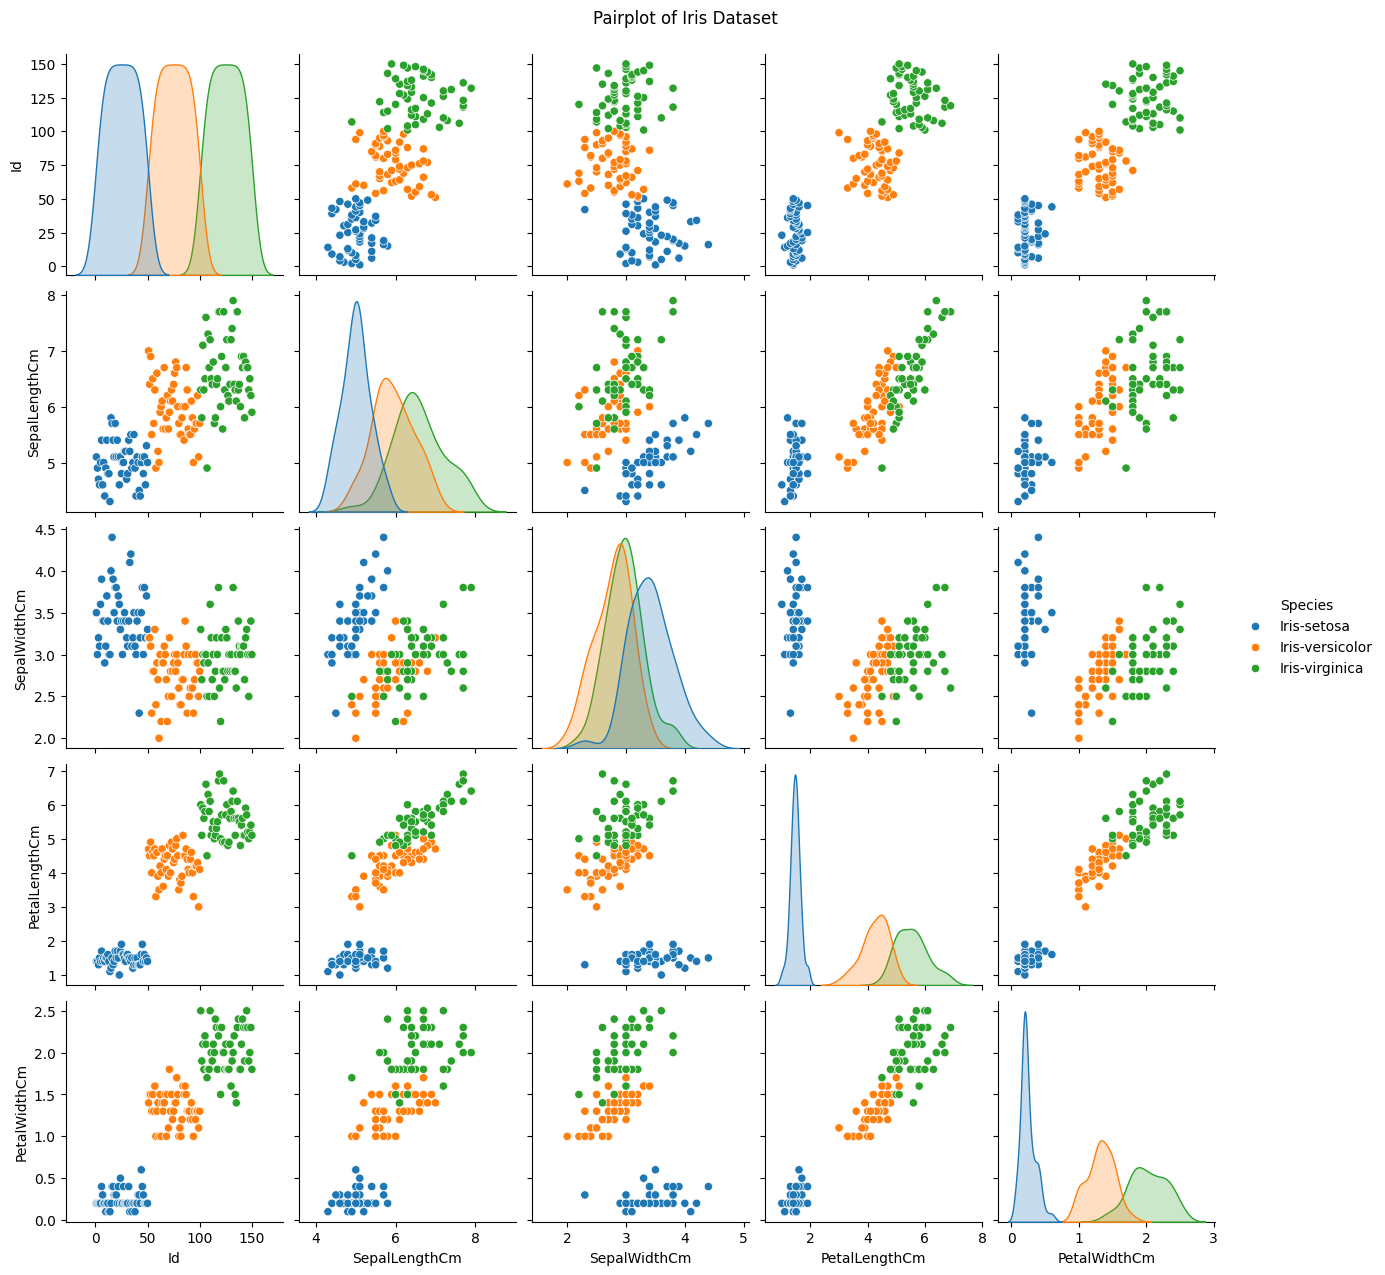

In [ ]:
sns.pairplot(data, hue='Species', diag_kind='kde')
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

HISTOGRAM

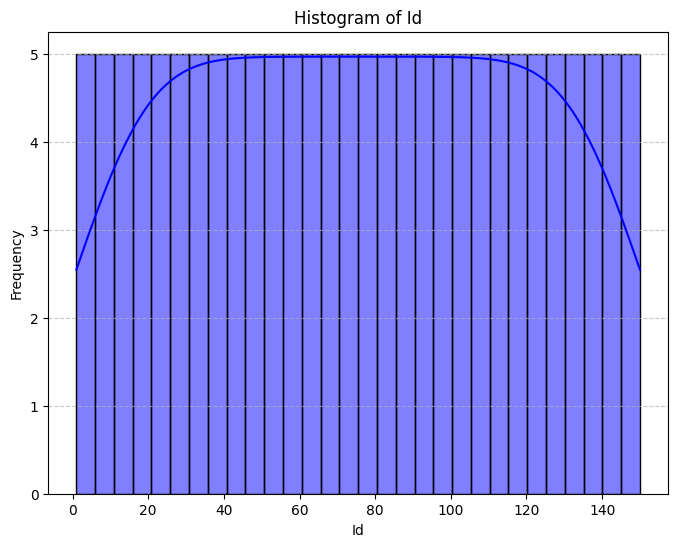

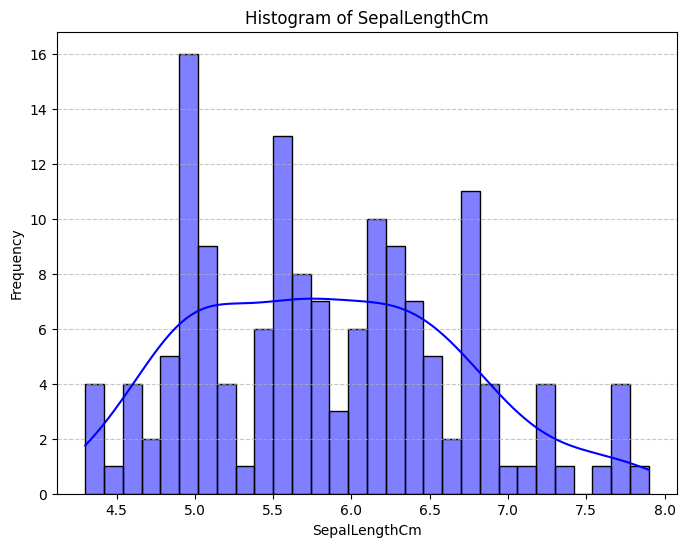

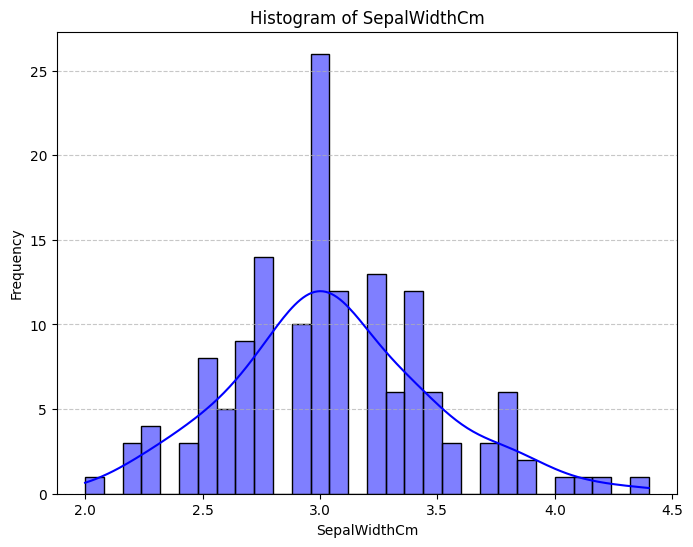

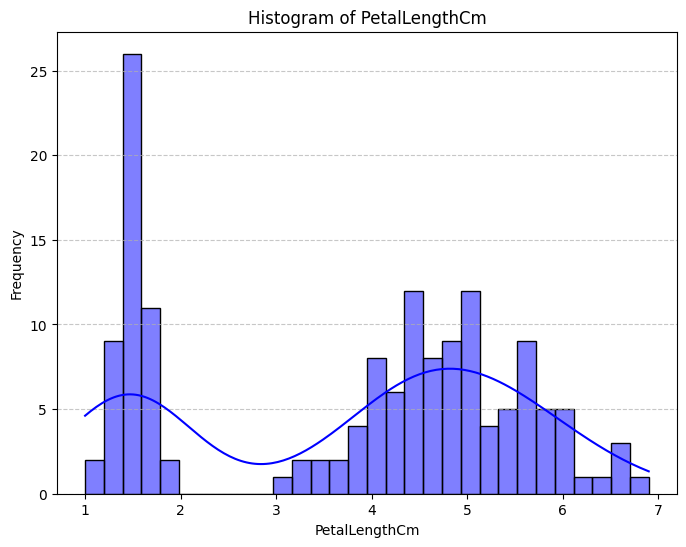

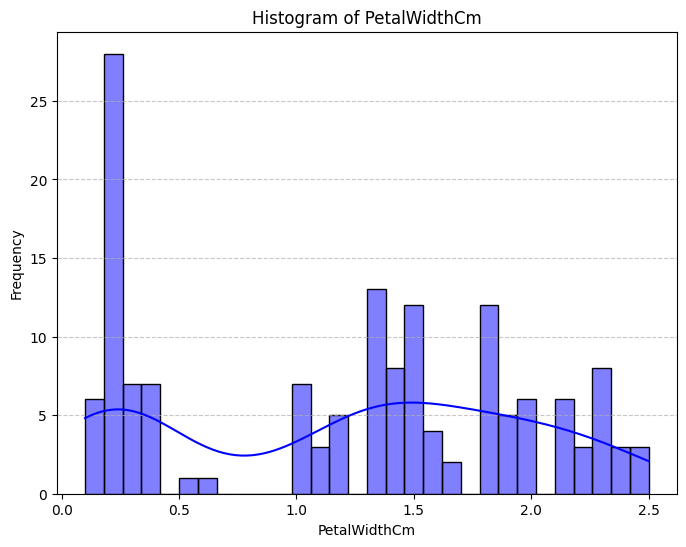

In [ ]:
numeric_columns = data.select_dtypes(include=['number']).columns

for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], kde=True, bins=30, color='blue')  # KDE adds a smooth curve
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

SCATTER PLOT

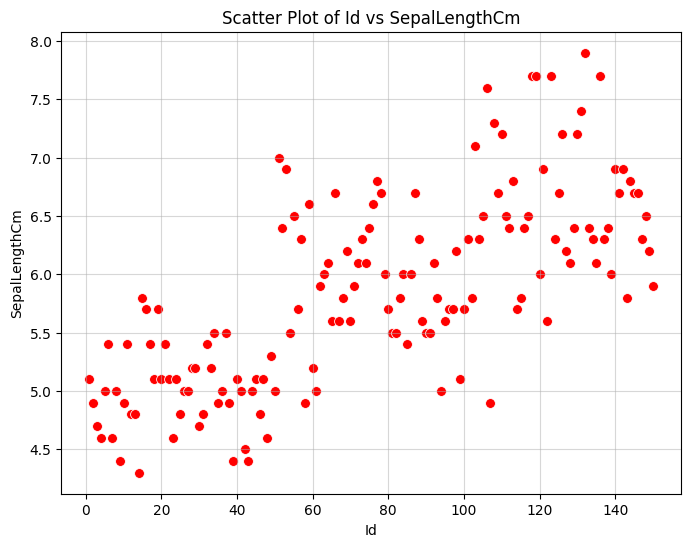

In [ ]:
if len(numeric_columns) > 1:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=numeric_columns[0], y=numeric_columns[1], data=data, color='red', s=50)
    plt.title(f"Scatter Plot of {numeric_columns[0]} vs {numeric_columns[1]}")
    plt.xlabel(numeric_columns[0])
    plt.ylabel(numeric_columns[1])
    plt.grid(alpha=0.5)
    plt.show()
else:
    print("Not enough numeric columns to create a scatter plot.")


CORRELATION HEATMAP

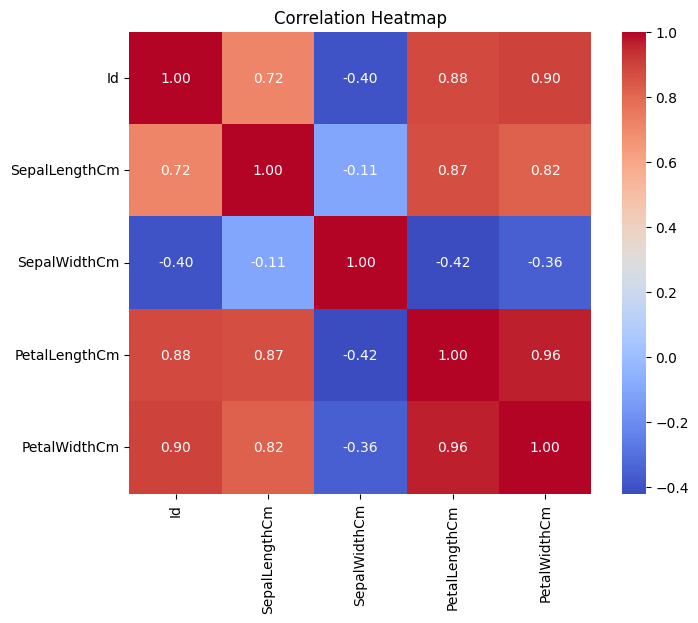

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure 'data' is a Pandas DataFrame
# Replace with your actual dataset
# Example: data = pd.read_csv('your_file.csv')

# Select only numeric columns to avoid errors
numeric_data = data.select_dtypes(include=['number'])

# Check if there are enough numeric columns for correlation
if numeric_data.shape[1] > 1:
    plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the heatmap
    sns.heatmap(
        numeric_data.corr(),  # Correlation matrix
        annot=True,           # Annotate each cell with correlation value
        cmap='coolwarm',      # Use a diverging colormap
        fmt=".2f",            # Format annotations to two decimal places
        square=True           # Square-shaped cells for a tidy look
    )

    plt.title("Correlation Heatmap")  # Add a title to the heatmap
    plt.show()  # Display the heatmap
else:
    print("Not enough numeric columns in the dataset to compute correlations.")


PREPROCESSING

In [ ]:
X = data.iloc[:, 1:-1]  # Select feature columns (exclude ID and species)
y = data['Species']  # Target column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
print(data)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

SPLITTING THE DATA

In [ ]:
#splitting the data
X=data.iloc[:,:4].values
Y=data.iloc[:,-1].values
print("X=",X)
print("\nY=",Y)

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

X= [[  1.    5.1   3.5   1.4]
 [  2.    4.9   3.    1.4]
 [  3.    4.7   3.2   1.3]
 [  4.    4.6   3.1   1.5]
 [  5.    5.    3.6   1.4]
 [  6.    5.4   3.9   1.7]
 [  7.    4.6   3.4   1.4]
 [  8.    5.    3.4   1.5]
 [  9.    4.4   2.9   1.4]
 [ 10.    4.9   3.1   1.5]
 [ 11.    5.4   3.7   1.5]
 [ 12.    4.8   3.4   1.6]
 [ 13.    4.8   3.    1.4]
 [ 14.    4.3   3.    1.1]
 [ 15.    5.8   4.    1.2]
 [ 16.    5.7   4.4   1.5]
 [ 17.    5.4   3.9   1.3]
 [ 18.    5.1   3.5   1.4]
 [ 19.    5.7   3.8   1.7]
 [ 20.    5.1   3.8   1.5]
 [ 21.    5.4   3.4   1.7]
 [ 22.    5.1   3.7   1.5]
 [ 23.    4.6   3.6   1. ]
 [ 24.    5.1   3.3   1.7]
 [ 25.    4.8   3.4   1.9]
 [ 26.    5.    3.    1.6]
 [ 27.    5.    3.4   1.6]
 [ 28.    5.2   3.5   1.5]
 [ 29.    5.2   3.4   1.4]
 [ 30.    4.7   3.2   1.6]
 [ 31.    4.8   3.1   1.6]
 [ 32.    5.4   3.4   1.5]
 [ 33.    5.2   4.1   1.5]
 [ 34.    5.5   4.2   1.4]
 [ 35.    4.9   3.1   1.5]
 [ 36.    5.    3.2   1.2]
 [ 37.    5.5   3.5   1.3

LOGISTIC REGRESSION

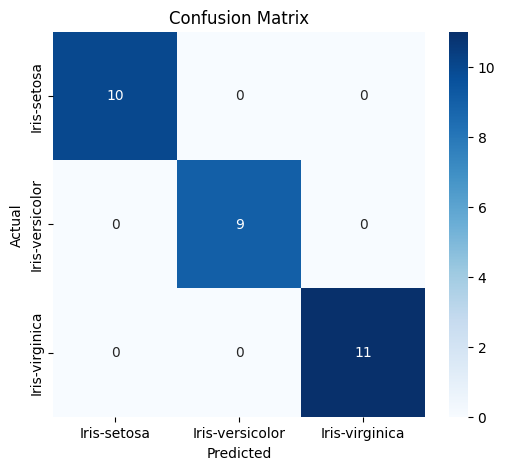

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

CLASSIFICATION REPORT

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Evaluation:
Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



DECISION TREE

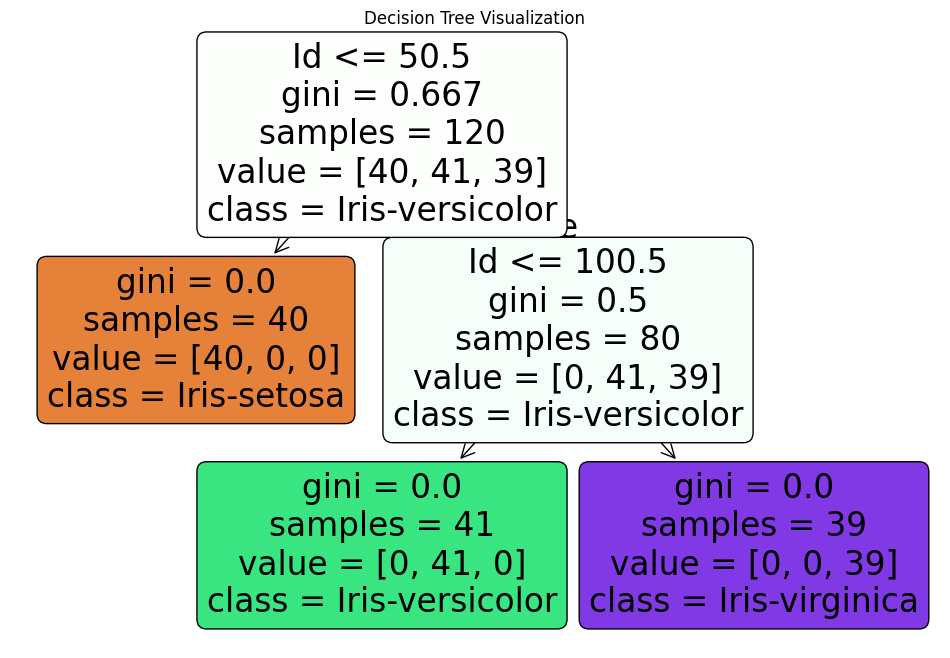

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the Decision Tree
plt.figure(figsize=(12, 8))

# Assuming 'data' is your Pandas DataFrame and 'dt' is your DecisionTreeClassifier
# Replace 'data' with your actual DataFrame if it's named differently
feature_names = data.columns[:4]  # Get feature names from DataFrame

# Use the class names from the trained model's classes_ attribute
plot_tree(dt,
          feature_names=feature_names,  # Use feature names from DataFrame
          class_names=[str(i) for i in dt.classes_],
          filled=True,
          rounded=True)

plt.title("Decision Tree Visualization")
plt.show()

SUPPORT VECTOR MACHINE

In [5]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load your Iris dataset here
# Replace 'Iris.csv' with the actual path to your file if needed
data = pd.read_csv('/content/Iris.csv')

# Data preprocessing and splitting
X = data.iloc[:, 1:-1]  # Select feature columns (exclude ID and species)
y = data['Species']  # Target column

le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Model training and evaluation
svm_model = SVC(kernel='linear', random_state=42)  # Using a linear kernel
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("SVM Classification Analysis Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

SVM Classification Analysis Results:
Accuracy: 1.00

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



MODEL ACCURACY COMPARISION

Model Accuracy Comparison:
Logistic Regression: 1.00
Decision Tree: 1.00


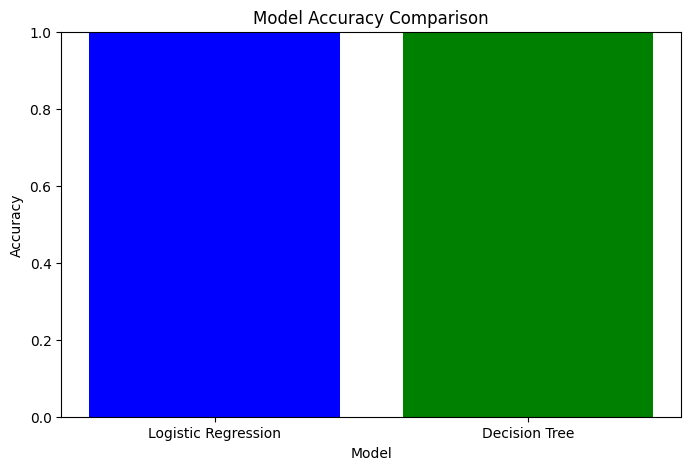

In [11]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
# Import LogisticRegression and DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Define models to compare
models = {
    "Logistic Regression": LogisticRegression(max_iter=200, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
}

results = {}

# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, model.predict(X_test))
    results[model_name] = accuracy

# Print accuracies
print("Model Accuracy Comparison:")
for model_name, acc in results.items():
    print(f"{model_name}: {acc:.2f}")

# Visualize accuracies
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color=['blue', 'green'])
plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()